In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from components import *
import math
import matplotlib

In [2]:
sns.set()

In [3]:
X = np.linspace(0, 10, 100).reshape((100, 1)) #+ np.random.randn(100, 1)
normX = lambda x: (x-min(X))/(max(X)-min(X))
Xn = normX(X)
y = X**3 + 2 + 2*np.random.randn(100, 1)

In [9]:
network = Network_Dense(
    sizes=[1, 1, 1],
    activation=Activation_Tanh,
    final_activation=Activation_Linear,
    optimizer=Optimizer_Adam,
    loss=MSE,
)

In [10]:
steps = []
for i in range(1000):
    network.train_once(Xn, y)
    steps.append([(layer.uW.copy(), layer.uB.copy()) for layer in network.layers])

In [12]:
steps[0]

[(array([[0.00834021]]), array([[0.01040438]])),
 (array([[-0.00056031]]), array([[0.50912373]]))]

In [5]:
network.train(Xn, y, epochs=10000)

epoch:	10000, loss: 9917.25959 (-93.28%), time: 1/1s           

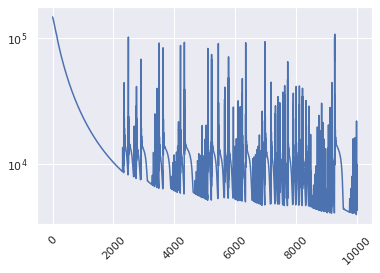

In [6]:
plt.yscale('log')
plt.xticks(rotation=45)
plt.plot(network.losses)

In [7]:
Xp = np.linspace(min(X), max(X))
yp = network.predict(normX(Xp))

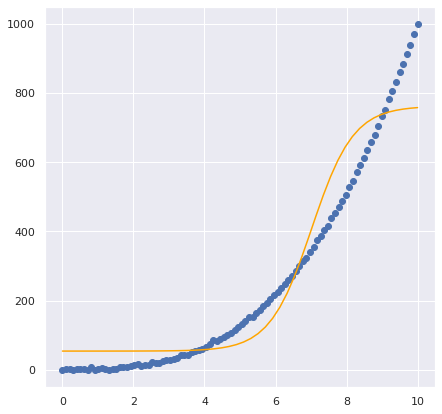

In [8]:
plt.figure(figsize=(7, 7))
plt.scatter(X, y)
plt.plot(Xp, yp, color='orange')